In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-dataset/validation.csv
/kaggle/input/emotion-dataset/training.csv
/kaggle/input/emotion-dataset/test.csv
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/saved_model.pb
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/keras_metadata.pb
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/assets/vocab.txt
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/variables/variables.index
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/variables/variables.data-00000-of-00001


In [2]:
!wget https://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/anger-ratings-0to1.train.txt
!wget https://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/fear-ratings-0to1.train.txt
!wget https://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/joy-ratings-0to1.train.txt
!wget https://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/sadness-ratings-0to1.train.txt

--2024-03-16 05:30:41--  https://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/anger-ratings-0to1.train.txt
Resolving saifmohammad.com (saifmohammad.com)... 192.185.17.122
Connecting to saifmohammad.com (saifmohammad.com)|192.185.17.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95686 (93K) [text/plain]
Saving to: 'anger-ratings-0to1.train.txt'

anger-ratings-0to1. 100%[===================>]  93.44K   312KB/s    in 0.3s    

2024-03-16 05:30:42 (312 KB/s) - 'anger-ratings-0to1.train.txt' saved [95686/95686]

--2024-03-16 05:30:43--  https://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/fear-ratings-0to1.train.txt
Resolving saifmohammad.com (saifmohammad.com)... 192.185.17.122
Connecting to saifmohammad.com (saifmohammad.com)|192.185.17.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133186 (130K) [text/plain]
Saving to: 'fear-ratings-0to1.train.txt'

fear-ratings-0to1.t 100%[===================>] 130.06K   435KB/s    in 0.3

In [3]:
!wget https://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data/anger-ratings-0to1.dev.target.txt
!wget http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data/fear-ratings-0to1.dev.target.txt
!wget http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data/joy-ratings-0to1.dev.target.txt
!wget http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data/sadness-ratings-0to1.dev.target.txt

--2024-03-16 05:30:49--  https://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data/anger-ratings-0to1.dev.target.txt
Resolving saifmohammad.com (saifmohammad.com)... 192.185.17.122
Connecting to saifmohammad.com (saifmohammad.com)|192.185.17.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9603 (9.4K) [text/plain]
Saving to: 'anger-ratings-0to1.dev.target.txt'

anger-ratings-0to1. 100%[===================>]   9.38K  --.-KB/s    in 0s      

2024-03-16 05:30:50 (88.8 MB/s) - 'anger-ratings-0to1.dev.target.txt' saved [9603/9603]

--2024-03-16 05:30:51--  http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data/fear-ratings-0to1.dev.target.txt
Resolving saifmohammad.com (saifmohammad.com)... 192.185.17.122
Connecting to saifmohammad.com (saifmohammad.com)|192.185.17.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12793 (12K) [text/plain]
Saving to: 'fear-ratings-0to1.dev.target.txt'

fear-ratings-0to1.d 100%[===================>]  12.49K  --

In [4]:
!wget http://saifmohammad.com/WebDocs/EmoInt%20Test%20Data/anger-ratings-0to1.test.target.txt
!wget http://saifmohammad.com/WebDocs/EmoInt%20Test%20Gold%20Data/fear-ratings-0to1.test.gold.txt
!wget http://saifmohammad.com/WebDocs/EmoInt%20Test%20Gold%20Data/joy-ratings-0to1.test.gold.txt
!wget http://saifmohammad.com/WebDocs/EmoInt%20Test%20Gold%20Data/sadness-ratings-0to1.test.gold.txt

--2024-03-16 05:30:55--  http://saifmohammad.com/WebDocs/EmoInt%20Test%20Data/anger-ratings-0to1.test.target.txt
Resolving saifmohammad.com (saifmohammad.com)... 192.185.17.122
Connecting to saifmohammad.com (saifmohammad.com)|192.185.17.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86506 (84K) [text/plain]
Saving to: 'anger-ratings-0to1.test.target.txt'

anger-ratings-0to1. 100%[===================>]  84.48K   283KB/s    in 0.3s    

2024-03-16 05:30:55 (283 KB/s) - 'anger-ratings-0to1.test.target.txt' saved [86506/86506]

--2024-03-16 05:30:56--  http://saifmohammad.com/WebDocs/EmoInt%20Test%20Gold%20Data/fear-ratings-0to1.test.gold.txt
Resolving saifmohammad.com (saifmohammad.com)... 192.185.17.122
Connecting to saifmohammad.com (saifmohammad.com)|192.185.17.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114255 (112K) [text/plain]
Saving to: 'fear-ratings-0to1.test.gold.txt'

fear-ratings-0to1.t 100%[===================>] 

In [5]:
import pandas as pd
joy_test =pd.read_csv("joy-ratings-0to1.test.gold.txt",sep="\t",header=None)
fear_test =pd.read_csv("fear-ratings-0to1.test.gold.txt",sep="\t",header=None)
anger_test=pd.read_csv("anger-ratings-0to1.test.target.txt",sep="\t",header=None)
sad_test=pd.read_csv("sadness-ratings-0to1.test.gold.txt",sep="\t",header=None)

In [6]:
joy_test=joy_test.set_axis(['idx', 'text', 'label', 'score'],axis=1)
fear_test=fear_test.set_axis(['idx', 'text', 'label', 'score'],axis=1)
anger_test=anger_test.set_axis(['idx', 'text', 'label', 'score'],axis=1)
sad_test=sad_test.set_axis(['idx', 'text', 'label', 'score'],axis=1)

In [7]:
test_df=pd.concat([joy_test.drop(columns=["idx"]),fear_test.drop(columns=["idx"]),anger_test.drop(columns=["idx"]),sad_test.drop(columns=["idx"])])

In [8]:
import pandas as pd
joy_val =pd.read_csv("joy-ratings-0to1.dev.target.txt",sep="\t",header=None)
fear_val =pd.read_csv("fear-ratings-0to1.dev.target.txt",sep="\t",header=None)
anger_val=pd.read_csv("anger-ratings-0to1.dev.target.txt",sep="\t",header=None)
sad_val=pd.read_csv("sadness-ratings-0to1.dev.target.txt",sep="\t",header=None)

In [9]:
joy_val=joy_val.set_axis(['idx', 'text', 'label', 'score'],axis=1)
fear_val=fear_val.set_axis(['idx', 'text', 'label', 'score'],axis=1)
anger_val=anger_val.set_axis(['idx', 'text', 'label', 'score'],axis=1)
sad_val=sad_val.set_axis(['idx', 'text', 'label', 'score'],axis=1)

In [10]:
valid_df=pd.concat([joy_val.drop(columns=["idx"]),fear_val.drop(columns=["idx"]),anger_val.drop(columns=["idx"]),sad_val.drop(columns=["idx"])])

In [11]:
import pandas as pd
joy =pd.read_csv("joy-ratings-0to1.train.txt",sep="\t",header=None)
fear =pd.read_csv("fear-ratings-0to1.train.txt",sep="\t",header=None)
anger=pd.read_csv("anger-ratings-0to1.train.txt",sep="\t",header=None)
sad=pd.read_csv("sadness-ratings-0to1.train.txt",sep="\t",header=None)

In [12]:
joy=joy.set_axis(['idx', 'text', 'label', 'intensity'],axis=1)
fear=fear.set_axis(['idx', 'text', 'label', 'intensity'],axis=1)
anger=anger.set_axis(['idx', 'text', 'label', 'intensity'],axis=1)
sad=sad.set_axis(['idx', 'text', 'label', 'intensity'],axis=1)

In [13]:
train_df=pd.concat([joy.drop(columns=["idx"]),fear.drop(columns=["idx"]),anger.drop(columns=["idx"]),sad.drop(columns=["idx"])])

In [14]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# train_df = pd.read_csv('/kaggle/input/emotion-dataset/training.csv')
# test_df = pd.read_csv('/kaggle/input/emotion-dataset/test.csv')
# valid_df = pd.read_csv('/kaggle/input/emotion-dataset/validation.csv')
train_df.head()

,text,label,intensity
0,Just got back from seeing @GaryDelaney in Burs...,joy,0.980
1,Oh dear an evening of absolute hilarity I don'...,joy,0.958
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,0.940
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0.938
4,I feel so blessed to work with the family that...,joy,0.938


In [16]:
# test_df = pd.read_csv('/kaggle/input/emotion-dataset/test.csv')
# valid_df = pd.read_csv('/kaggle/input/emotion-dataset/validation.csv')

<Axes: ylabel='count'>

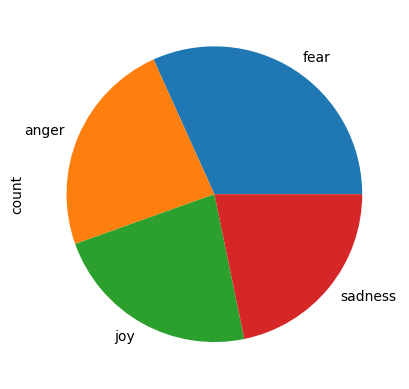

In [17]:
train_df.label.value_counts().plot(kind="pie")

In [18]:
shuffeled_train_df=train_df.sample(len(train_df))

In [19]:
# text data to numerical features 
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
train_features = tfidf_vectorizer.fit_transform(shuffeled_train_df["text"])
test_features = tfidf_vectorizer.transform(test_df["text"])

In [20]:
model = MultinomialNB()
model.fit(train_features,shuffeled_train_df["label"])

MultinomialNB()

In [21]:
predictions = model.predict(test_features)

accuracy = accuracy_score(test_df['label'], predictions)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(test_df['label'], predictions))

Accuracy: 0.76
              precision    recall  f1-score   support

       anger       0.83      0.71      0.76       760
        fear       0.66      0.88      0.76       995
         joy       0.85      0.76      0.80       714
     sadness       0.80      0.62      0.70       673

    accuracy                           0.76      3142
   macro avg       0.78      0.74      0.76      3142
weighted avg       0.77      0.76      0.76      3142



In [22]:
validation_df = valid_df
test_df = test_df

validation_features = tfidf_vectorizer.transform(validation_df['text'])
validation_labels = validation_df['label']

test_features = tfidf_vectorizer.transform(test_df['text'])
test_labels = test_df['label']

# Validating model on validation set
validation_predictions = model.predict(validation_features)
validation_accuracy = accuracy_score(validation_labels, validation_predictions)
print(f'Validation Accuracy: {validation_accuracy:.2f}')
print('Validation Classification Report:')
print(classification_report(validation_labels, validation_predictions))

test_predictions = model.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Test Classification Report:')
print(classification_report(test_labels, test_predictions))

Validation Accuracy: 0.80
Validation Classification Report:
              precision    recall  f1-score   support

       anger       0.80      0.73      0.76        84
        fear       0.72      0.89      0.79       110
         joy       0.89      0.80      0.84        79
     sadness       0.86      0.73      0.79        74

    accuracy                           0.80       347
   macro avg       0.82      0.79      0.80       347
weighted avg       0.81      0.80      0.80       347

Test Accuracy: 0.76
Test Classification Report:
              precision    recall  f1-score   support

       anger       0.83      0.71      0.76       760
        fear       0.66      0.88      0.76       995
         joy       0.85      0.76      0.80       714
     sadness       0.80      0.62      0.70       673

    accuracy                           0.76      3142
   macro avg       0.78      0.74      0.76      3142
weighted avg       0.77      0.76      0.76      3142



In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(train_features,shuffeled_train_df["label"])

RandomForestClassifier(n_estimators=500)

In [24]:
model=rf
validation_df =valid_df
test_df = test_df

validation_features = tfidf_vectorizer.transform(validation_df['text'])
validation_labels = validation_df['label']

test_features = tfidf_vectorizer.transform(test_df['text'])
test_labels = test_df['label']

# Validating model on validation set
validation_predictions = model.predict(validation_features)
validation_accuracy = accuracy_score(validation_labels, validation_predictions)
print(f'Validation Accuracy: {validation_accuracy:.2f}')
print('Validation Classification Report:')
print(classification_report(validation_labels, validation_predictions))

test_predictions = model.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Test Classification Report:')
print(classification_report(test_labels, test_predictions))

Validation Accuracy: 0.84
Validation Classification Report:
              precision    recall  f1-score   support

       anger       0.90      0.76      0.83        84
        fear       0.78      0.89      0.83       110
         joy       0.94      0.84      0.89        79
     sadness       0.77      0.84      0.80        74

    accuracy                           0.84       347
   macro avg       0.85      0.83      0.84       347
weighted avg       0.84      0.84      0.84       347

Test Accuracy: 0.82
Test Classification Report:
              precision    recall  f1-score   support

       anger       0.90      0.76      0.83       760
        fear       0.76      0.86      0.81       995
         joy       0.91      0.85      0.88       714
     sadness       0.77      0.79      0.78       673

    accuracy                           0.82      3142
   macro avg       0.83      0.82      0.82      3142
weighted avg       0.83      0.82      0.82      3142



In [25]:
predictions = rf.predict(test_features)

accuracy = accuracy_score(test_df['label'], predictions)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(test_df['label'], predictions))

Accuracy: 0.82
              precision    recall  f1-score   support

       anger       0.90      0.76      0.83       760
        fear       0.76      0.86      0.81       995
         joy       0.91      0.85      0.88       714
     sadness       0.77      0.79      0.78       673

    accuracy                           0.82      3142
   macro avg       0.83      0.82      0.82      3142
weighted avg       0.83      0.82      0.82      3142



In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(train_features,shuffeled_train_df["label"])

KNeighborsClassifier(n_neighbors=6)

In [27]:
model=knn
validation_df = valid_df
test_df = test_df

validation_features = tfidf_vectorizer.transform(validation_df['text'])
validation_labels = validation_df['label']

test_features = tfidf_vectorizer.transform(test_df['text'])
test_labels = test_df['label']

# Validating model on validation set
validation_predictions = model.predict(validation_features)
validation_accuracy = accuracy_score(validation_labels, validation_predictions)
print(f'Validation Accuracy: {validation_accuracy:.2f}')
print('Validation Classification Report:')
print(classification_report(validation_labels, validation_predictions))

test_predictions = model.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Test Classification Report:')
print(classification_report(test_labels, test_predictions))

Validation Accuracy: 0.67
Validation Classification Report:
              precision    recall  f1-score   support

       anger       0.79      0.65      0.71        84
        fear       0.61      0.82      0.70       110
         joy       0.80      0.51      0.62        79
     sadness       0.58      0.62      0.60        74

    accuracy                           0.67       347
   macro avg       0.69      0.65      0.66       347
weighted avg       0.69      0.67      0.66       347

Test Accuracy: 0.64
Test Classification Report:
              precision    recall  f1-score   support

       anger       0.69      0.61      0.65       760
        fear       0.59      0.76      0.66       995
         joy       0.79      0.50      0.62       714
     sadness       0.60      0.64      0.62       673

    accuracy                           0.64      3142
   macro avg       0.67      0.63      0.64      3142
weighted avg       0.66      0.64      0.64      3142

